In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

## 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [44]:
claim_data = pd.read_csv("claims.csv")
claim_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [45]:
cust_data = pd.read_csv("cust_demographics.csv")
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [46]:
insurance_claim = pd.merge(left = claim_data, right = cust_data, left_on = 'customer_id', right_on = 'CUST_ID', how = 'outer')
insurance_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476.0,Female,01-May-86,MA,413-187-7945,Silver


In [47]:
insurance_claim.drop(columns ='CUST_ID', inplace = True)

## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [48]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1092 non-null   object 
 11  DateOfBirth          1092 non-null   object 
 12  State                1092 non-null   object 
 13  Contact              1092 non-null   object 
 14  Segment              1092 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [49]:
## After seeing the data info, we need to change the data type of columns: claim_date, claim_amount, DateOfBirth 

insurance_claim.claim_date = pd.to_datetime(insurance_claim['claim_date'], format = "%m/%d/%Y")

In [50]:
insurance_claim['DateOfBirth'] = pd.to_datetime(insurance_claim['DateOfBirth'], format = "%d-%b-%y")

In [51]:
insurance_claim['DateOfBirth'] = insurance_claim.DateOfBirth.apply( lambda x : x - pd.DateOffset(years = 100) if x.year > 2000 else x)

In [79]:
insurance_claim['total_policy_claims'] = insurance_claim['total_policy_claims'].astype('object')

## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [53]:
insurance_claim.claim_amount = insurance_claim['claim_amount'].str.replace("$", "")

C:\Users\pawans\AppData\Local\Temp\ipykernel_11424\1569275133.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  insurance_claim.claim_amount = insurance_claim['claim_amount'].str.replace("$", "")


In [54]:
insurance_claim.claim_amount = insurance_claim['claim_amount'].astype("float")

In [80]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 1055 to 1100
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1094 non-null   float64       
 1   customer_id          1094 non-null   float64       
 2   incident_cause       1094 non-null   object        
 3   claim_date           1094 non-null   datetime64[ns]
 4   claim_area           1094 non-null   object        
 5   police_report        1094 non-null   object        
 6   claim_type           1094 non-null   object        
 7   claim_amount         1094 non-null   float64       
 8   total_policy_claims  1094 non-null   object        
 9   fraudulent           1094 non-null   object        
 10  gender               1094 non-null   object        
 11  DateOfBirth          1094 non-null   datetime64[ns]
 12  State                1094 non-null   object        
 13  Contact              1094 non-

## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [56]:
insurance_claim.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury', nan],
      dtype=object)

In [57]:
insurance_claim['alert_flag'] = np.where((insurance_claim.claim_type.str.contains('injury', case = False)) & (insurance_claim.police_report == 'No'), 1 , 0)

In [58]:
insurance_claim.police_report.unique()

array(['No', 'Unknown', 'Yes', nan], dtype=object)

## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
## Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [60]:
# sort the DataFrame by date in descending order
insurance_claim.sort_values('claim_date', ascending = False, inplace = True)

# drop duplicates based on customer_id, keeping the most recent observation
insurance_claim.drop_duplicates(subset = ['customer_id'], keep = 'first', inplace = True)

In [61]:
insurance_claim.shape

(1094, 16)

## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [62]:
insurance_claim.isna().sum()

claim_id                1
customer_id             1
incident_cause          1
claim_date              1
claim_area              1
police_report           1
claim_type              1
claim_amount           66
total_policy_claims    11
fraudulent              1
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [63]:
continuous_col = insurance_claim.select_dtypes(include = ["number"]).columns
continuous_col

Index(['claim_id', 'customer_id', 'claim_amount', 'alert_flag'], dtype='object')

In [64]:
categorical_col = insurance_claim.select_dtypes(include = ["object", 'datetime']).columns
categorical_col

Index(['incident_cause', 'claim_date', 'claim_area', 'police_report',
       'claim_type', 'total_policy_claims', 'fraudulent', 'gender',
       'DateOfBirth', 'State', 'Contact', 'Segment'],
      dtype='object')

In [65]:
for col in continuous_col:
    insurance_claim[col].fillna(insurance_claim[col].mean(), inplace = True)

In [66]:
for col in categorical_col:
    insurance_claim[col].fillna(insurance_claim[col].mode()[0], inplace = True)

In [67]:
insurance_claim.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert_flag             0
dtype: int64

## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [68]:
insurance_claim['age'] = (pd.Timestamp.now() - insurance_claim['DateOfBirth']).astype('<m8[Y]')

In [69]:
bins = [0, 18, 30, 60, 100]
labels = ['Children', 'Youth', 'Adult', 'Senior']
insurance_claim['age_category'] = pd.cut(insurance_claim['age'], bins = bins, labels = labels)

In [70]:
insurance_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
1055,43042986.0,58451506.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22,FL,673-574-7823,Gold,0,54.0,Adult
286,99775483.0,93915431.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,1,55.0,Adult
697,32178193.0,86491727.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,Female,1997-01-29,IL,294-187-3286,Gold,0,26.0,Youth
354,98795403.0,38011078.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,0,46.0,Adult
1077,91386759.0,65208809.0,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,0,58.0,Adult


## 8. What is the average amount claimed by the customers from various segments?

In [71]:
insurance_claim.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12760.923744
Platinum,12370.565077
Silver,12265.736955


## 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [29]:
filtered_claim = insurance_claim[(pd.to_datetime('2018-10-01') - insurance_claim['claim_date']).dt.days >= 20]

In [30]:
filtered_claim.groupby("incident_cause")[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.269595e+05
Driver error,3.344546e+06
Natural causes,1.315301e+06
Other causes,3.790499e+06
Other driver error,3.342803e+06


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [31]:
insurance_claim.loc[(insurance_claim['age_category'] == 'Adult') & 
                             (insurance_claim['State'].isin(['TX', 'DE', 'AK'])) &
                             (insurance_claim['incident_cause'].str.contains('Driver', case = False))].groupby('State')[['age_category']].count()

,age_category
State,
AK,8
DE,10
TX,9


## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

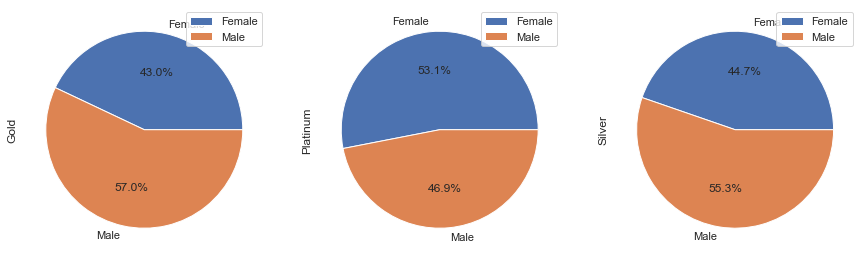

In [32]:
pivot_table = insurance_claim.pivot_table(index = 'gender', columns = 'Segment', values = 'claim_amount', aggfunc = 'sum')
pivot_table.plot(kind = 'pie', subplots = True, figsize = (15,8), autopct = "%1.1f%%")
plt.show()

## 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

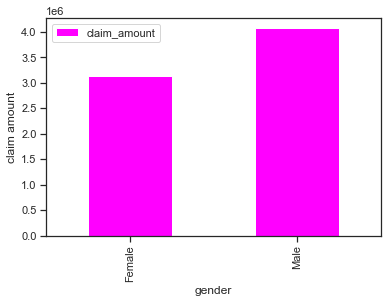

In [33]:
insurance_claim.loc[insurance_claim.incident_cause.str.contains("driver", case = False)].groupby("gender")[['claim_amount']].sum().plot(kind = 'bar', color = 'magenta')
plt.ylabel("claim amount")
plt.show()

## 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

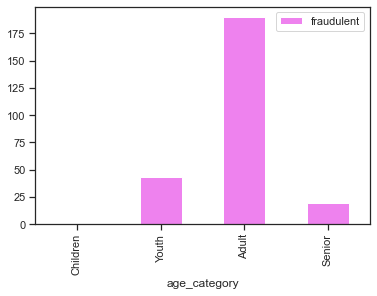

In [34]:
insurance_claim.loc[insurance_claim.fraudulent == 'Yes'].groupby("age_category")[['fraudulent']].count().plot(kind = 'bar', color = 'blue')
plt.show()

## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

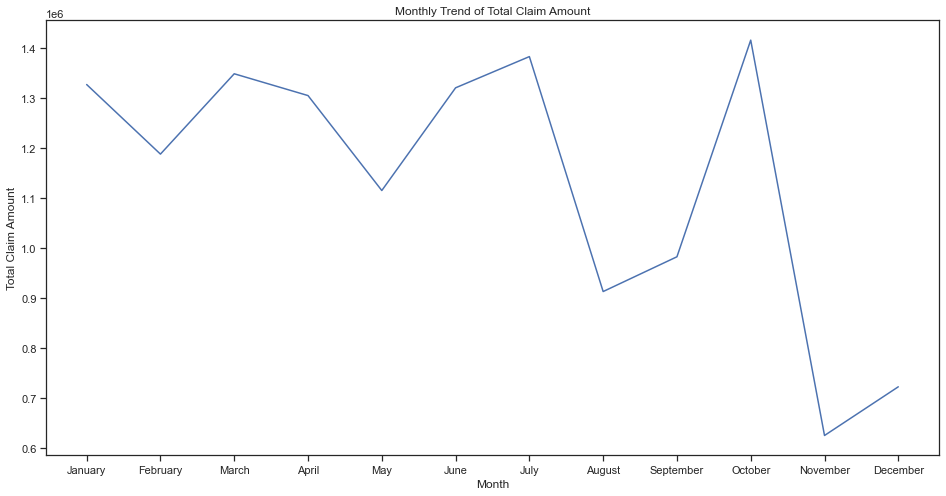

In [35]:
insurance_claim['month'] = insurance_claim['claim_date'].dt.month

# Group the data by month and calculate the sum of claim_amount
monthly_claim_amount = insurance_claim.groupby('month')['claim_amount'].sum()

# Sort the data by month in chronological order
monthly_claim_amount = monthly_claim_amount.sort_index()
import calendar
month_names = [calendar.month_name[i] for i in range(1, 13)]
# line plot using the monthly_claim_amount data
plt.figure(figsize = (16,8))
plt.plot(monthly_claim_amount.index, monthly_claim_amount.values)
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.xticks(range(1, 13), month_names)
plt.show()

## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

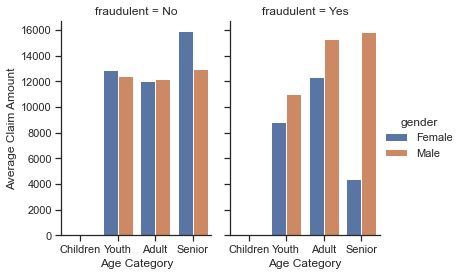

In [37]:
avg_claim_amount = insurance_claim.groupby(['gender', 'age_category', 'fraudulent'])['claim_amount'].mean().reset_index()

# Create a facetted bar chart
g = sns.catplot(x='age_category', y='claim_amount', hue = 'gender', col = 'fraudulent', data = avg_claim_amount, kind = 'bar', height = 4, aspect = .7)
g.set_axis_labels('Age Category', 'Average Claim Amount')
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

## 16. Is there any similarity in the amount claimed by males and females?

In [38]:
## To test whether there is any similarity in the amount claimed by males and females, we can use a two-sample t-test.

## Step 1: Defining the null and alternate hypothesis - 

## H0: There is no difference in the mean amount claimed by males and females.
## Ha: There is a difference in the mean amount claimed by males and females.

## Step 2: set the level of significance - 
## CI = 95%
## alpha - 0.05


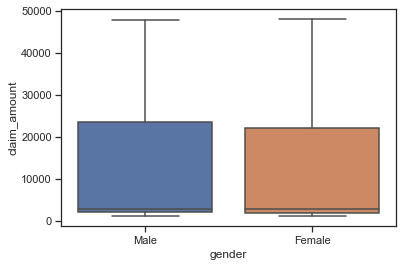

In [39]:
sns.boxplot(x = insurance_claim.gender, y = insurance_claim.claim_amount )
plt.show()

In [40]:
## Step 3: conduct the two sample t-test:
import scipy.stats as stats
male_claim = insurance_claim[insurance_claim['gender'] == 'Male']['claim_amount']
female_claim = insurance_claim[insurance_claim['gender'] == 'Female']['claim_amount']

In [41]:
stats.ttest_ind(male_claim, female_claim)

Ttest_indResult(statistic=0.897717439924586, pvalue=0.3695340884125583)

In [42]:
## we can also perform ANOVA :

stats.f_oneway(male_claim, female_claim)

F_onewayResult(statistic=0.8058966019447521, pvalue=0.3695340884120908)

#### Step 4: conclusion - 
#### The p-value obtained from the test is greater than the level of significance (alpha=0.05), which suggests that we fail to reject the null hypothesis. Therefore, we can conclude that there is not enough evidence to suggest a difference in the mean amount claimed by males and females.
#### From a business perspective, this result may suggest that gender is not a significant factor in determining the amount claimed by customers. However, it is important to note that there may be other factors that can influence the amount claimed, such as age, occupation, etc. Further analysis may be required to understand the impact of these factors on the amount claimed.

## 17. Is there any relationship between age category and segment?

In [43]:
## To test if there is any relationship between age category and segment, we can use a chi-square test of independence.

## Step 1: Defining the null and alternate hypothesis - 

## H0: there is no relationship between age category and segment.
## Ha: there is an relationship between age category and segment.

## Step 2: set the level of significance - 
## CI = 95%
## alpha - 0.05

In [44]:
## Step 3: Create a contingency table of observed frequencies of age category and segment.

observed_freq = pd.crosstab(index = insurance_claim.Segment, columns = insurance_claim.age_category)
observed_freq

age_category,Youth,Adult,Senior
Segment,,,
Gold,73,281,33
Platinum,74,268,19
Silver,77,251,18


In [45]:
## Step 4: perform the chi-square test:
stats.chi2_contingency(observed_freq)

(5.358947072709569,
 0.25240916055320506,
 4,
 array([[ 79.23948812, 282.99817185,  24.76234004],
        [ 73.91590494, 263.98537477,  23.09872029],
        [ 70.84460695, 253.01645338,  22.13893967]]))

##### The result of the chi-square test includes three values: the chi-square statistic, the p-value, and the degrees of freedom, as well as the expected frequency counts.

#### In the given result, the chi-square statistic value is 5.3589, which indicates the strength of the relationship between the age category and segment. The p-value is 0.2524, which is greater than the standard significance level of 0.05, suggesting that we fail to reject the null hypothesis, and there is no significant relationship between the age category and segment. The degrees of freedom are 4, and the expected frequency counts are given in the array.

##### In summary, the chi-square test suggests that there is no significant relationship between age category and segment. Therefore, we can conclude that there is no evidence to suggest that age category influences the choice of segment for insurance claims.

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [46]:
insurance_claim.claim_date.dt.year.unique()

array([2018, 2017], dtype=int64)

In [47]:
insurance_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,month
1055,43042986.0,58451506.0,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22,FL,673-574-7823,Gold,0,54.0,Adult,10
286,99775483.0,93915431.0,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,1,55.0,Adult,10
697,32178193.0,86491727.0,Driver error,2018-10-30,Home,Unknown,Material only,1860.0,1.0,No,Female,1997-01-29,IL,294-187-3286,Gold,0,26.0,Youth,10
354,98795403.0,38011078.0,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,0,46.0,Adult,10
1077,91386759.0,65208809.0,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,0,58.0,Adult,10


In [192]:
insurance_claim.loc[insurance_claim.claim_date.dt.year == 2017]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,month
937,7299594.0,74633480.0,Other causes,2017-12-30,Auto,Yes,Material only,2790.0,3.0,No,Male,1966-06-22,MI,598-245-7941,Gold,0,56.0,Adult,12
753,63268924.0,5864769.0,Crime,2017-12-30,Auto,Yes,Injury only,34460.0,1.0,No,Male,1982-11-17,CO,314-953-3162,Gold,0,40.0,Adult,12
343,49550521.0,81131066.0,Other causes,2017-12-30,Auto,No,Material only,1920.0,2.0,No,Male,1968-11-01,AL,579-265-6183,Gold,0,54.0,Adult,12
1021,26058387.0,23445933.0,Crime,2017-12-30,Auto,No,Material only,1670.0,2.0,No,Female,1966-01-01,MS,657-568-6495,Platinum,0,57.0,Adult,12
525,42019165.0,42014103.0,Driver error,2017-12-30,Home,No,Material only,2288.5,4.0,Yes,Male,1999-02-06,MS,561-657-4953,Gold,0,24.0,Youth,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,39131766.0,39587790.0,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,0,58.0,Adult,1
383,36457152.0,25634799.0,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,Female,1974-11-04,KS,724-781-3692,Platinum,0,48.0,Adult,1
581,97666948.0,97514724.0,Driver error,2017-01-01,Home,No,Injury only,19120.0,1.0,No,Male,1969-06-08,FL,641-684-7986,Platinum,1,53.0,Adult,1
231,61374372.0,77219712.0,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05,NH,649-592-8793,Platinum,1,23.0,Youth,1


In [48]:
## we need to perform t-test to check this hypothesis.
## H0: The current year's claim amount is not significantly different from the 2016-17 fiscal average of $10,000.
## Ha: The current year's claim amount is significantly different from the 2016-17 fiscal average of $10,000.
## CI = 95%
## p-value = 0.05

In [58]:
claim_2017 = insurance_claim.loc[insurance_claim.claim_date.dt.year == 2017, 'claim_amount']
claim_2017.mean()

12308.585665427918

In [54]:
claim_2018 = insurance_claim.loc[insurance_claim.claim_date.dt.year == 2018, 'claim_amount']
claim_2018.mean()

12678.978667295441

In [55]:
stats.ttest_1samp(claim_2018,10000 )

Ttest_1sampResult(statistic=4.423068885445179, pvalue=1.1988079092168712e-05)

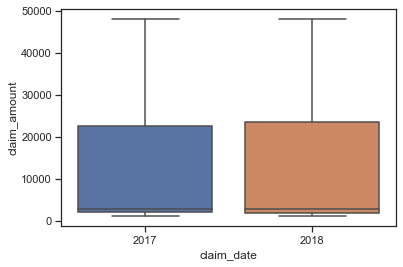

In [65]:
sns.boxplot(x = insurance_claim.claim_date.dt.year , y = insurance_claim.claim_amount)
plt.show()

### Here the p-value is 1.199e-05 (very small). Therefore, we can reject the null hypothesis that the mean claim amount for the current year is equal to the 2016-17 fiscal average, and conclude that the current year has indeed shown a significant rise in claim amounts.

## 19. Is there any difference between age groups and insurance claims?

In [67]:
insurance_claim.age_category.value_counts()

Adult       800
Youth       224
Senior       70
Children      0
Name: age_category, dtype: int64

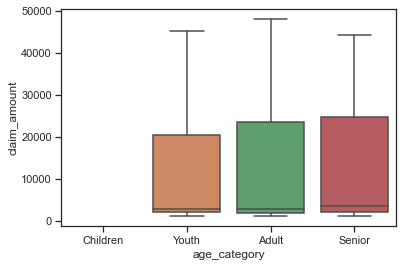

In [69]:
sns.boxplot(x = insurance_claim.age_category, y = insurance_claim.claim_amount)
plt.show()

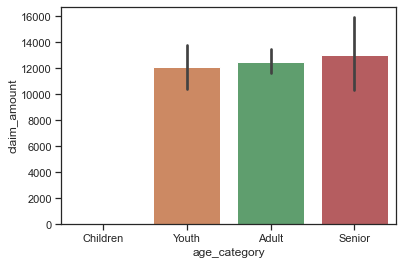

In [70]:
sns.barplot(x = insurance_claim.age_category, y = insurance_claim.claim_amount)
plt.show()

In [71]:
## Here to test this we will perform f-test/ANOVA

## Ho : There is no significant difference between age groups and insurance claims.
## Ha : There is a significant difference between age groups and insurance claims.

## CI = 95%
## p critical = 0.05

In [78]:
## Children claim amount is zero, hence we will not use this age_category to test the ANOVA. 
youth = insurance_claim.loc[insurance_claim.age_category == 'Youth', 'claim_amount']
Adult = insurance_claim.loc[insurance_claim.age_category == 'Adult', 'claim_amount']
Senior = insurance_claim.loc[insurance_claim.age_category == 'Senior', 'claim_amount']

In [79]:
youth.mean()

12126.136123801416

In [80]:
Adult.mean()

12524.92559946498

In [81]:
Senior.mean()

13028.592808504724

In [77]:
stats.f_oneway(youth, Adult, Senior)

F_onewayResult(statistic=0.14212286417886513, pvalue=0.8675307220938872)

###  Here the p-value is greater than the significance level (α=0.05) which suggests that there is no significant difference between the mean claim amounts of different age categories. Therefore, we fail to reject the null hypothesis.

## 20. Is there any relationship between total number of policy claims and the claimed amount?

In [116]:
insurance_claim.total_policy_claims.value_counts()

1.0    798
2.0    107
3.0     88
4.0     61
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [115]:
insurance_claim.total_policy_claims.unique()

array([1., 2., 3., 4., 6., 5., 8., 7.])

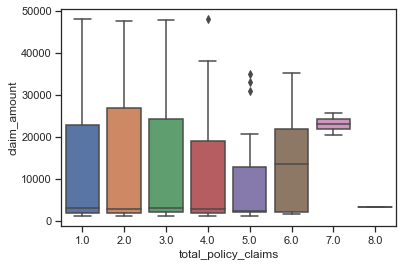

In [117]:
sns.boxplot(x = insurance_claim.total_policy_claims, y = insurance_claim.claim_amount)
plt.show()

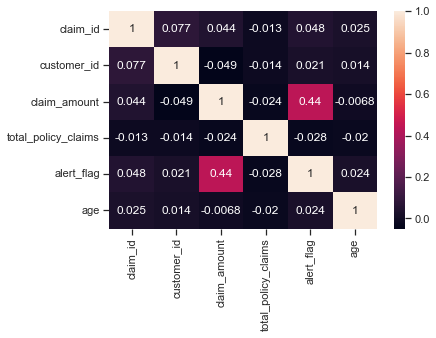

In [122]:
sns.heatmap(insurance_claim.corr(), annot = True)
plt.show()

In [118]:
## To test this we can perform Pearson correlation test or ANOVA.
## Ho : There is no relationship between the total number of policy claims and the claimed amount.

## Ha : There is a relationship between the total number of policy claims and the claimed amount.

## CI = 95%

## p-critical = 0.05

In [119]:
## Pearson correlation test:

stats.pearsonr(insurance_claim.total_policy_claims, insurance_claim.claim_amount)

(-0.024401245154551575, 0.4200785709762399)

In [124]:
## perform ANOVA

s1 = insurance_claim.loc[insurance_claim.total_policy_claims == 1, 'claim_amount']
s2 = insurance_claim.loc[insurance_claim.total_policy_claims == 2, 'claim_amount']
s3 = insurance_claim.loc[insurance_claim.total_policy_claims == 3, 'claim_amount']
s4 = insurance_claim.loc[insurance_claim.total_policy_claims == 4, 'claim_amount']
s5 = insurance_claim.loc[insurance_claim.total_policy_claims == 5, 'claim_amount']
s6 = insurance_claim.loc[insurance_claim.total_policy_claims == 6, 'claim_amount']
s7 = insurance_claim.loc[insurance_claim.total_policy_claims == 7, 'claim_amount']
s8 = insurance_claim.loc[insurance_claim.total_policy_claims == 8, 'claim_amount']

In [125]:
stats.f_oneway(s1,s2,s3,s4,s5,s6,s7,s8)

F_onewayResult(statistic=0.8862609999121766, pvalue=0.5165546360834834)

### From Pearson correlation test, it is negative which shows there is a weak negative correlation (-0.024) between the total number of policy claims and the claimed amount. However, the p-value (0.420) is greater than the significance level of 0.05, indicating that there is not enough evidence to reject the null hypothesis. Therefore, we can conclude that there is no significant relationship between the total number of policy claims and the claimed amount.
### The same results can be concluded from ANOVA also.